In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
data_transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

trainset = FashionMNIST('.', train=True, transform=data_transform, download=True)
testset = FashionMNIST('.', train=False, transform=data_transform, download=True)

In [3]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(96, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            
            nn.Linear(256*6*6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(p=0.5),
            
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, 10),
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [4]:
def train(epoch):
    print('training......')
    net.train()
    batch_num = len(trainloader)
    for step, data in enumerate(trainloader):
        img, label = data
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()

        out = net(img)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print_loss = loss.data.item()
            train_loss.append(print_loss)
            print('epoch: {}, batch: {}/{}, loss: {:.4}'.format(epoch, step, batch_num, print_loss))

In [5]:
def test():
    print('testing......')
    net.eval()
    eval_loss = 0
    eval_acc = 0
    for data in tqdm(testloader):
        img, label = data
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        out = net(img)
        loss = criterion(out, label)
        eval_loss += loss.data.item()*label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
        eval_loss/(len(testset)),                  
        eval_acc/(len(testset))
    ))

In [6]:
batch_size = 64
learning_rate = 0.001
num_epoches = 20

In [7]:
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [8]:
net = AlexNet()
if torch.cuda.is_available():
    print('使用GPU')
    net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

使用GPU


training......
epoch: 0, batch: 0/938, loss: 2.3
epoch: 0, batch: 100/938, loss: 1.01
epoch: 0, batch: 200/938, loss: 0.7267
epoch: 0, batch: 300/938, loss: 0.7352
epoch: 0, batch: 400/938, loss: 0.5596
epoch: 0, batch: 500/938, loss: 0.5523
epoch: 0, batch: 600/938, loss: 0.6225
epoch: 0, batch: 700/938, loss: 0.3035
epoch: 0, batch: 800/938, loss: 0.3724
epoch: 0, batch: 900/938, loss: 0.2632
testing......



Test Loss: 0.409526, Acc: 0.844600
training......
epoch: 1, batch: 0/938, loss: 0.3225
epoch: 1, batch: 100/938, loss: 0.3086
epoch: 1, batch: 200/938, loss: 0.6571
epoch: 1, batch: 300/938, loss: 0.5182
epoch: 1, batch: 400/938, loss: 0.2512
epoch: 1, batch: 500/938, loss: 0.3749
epoch: 1, batch: 600/938, loss: 0.2855
epoch: 1, batch: 700/938, loss: 0.55
epoch: 1, batch: 800/938, loss: 0.4748
epoch: 1, batch: 900/938, loss: 0.6468
testing......



Test Loss: 0.359745, Acc: 0.860400
training......
epoch: 2, batch: 0/938, loss: 0.285
epoch: 2, batch: 100/938, loss: 0.3589
epoch: 2, batch: 200/938, loss: 0.2048
epoch: 2, batch: 300/938, loss: 0.3286
epoch: 2, batch: 400/938, loss: 0.4531
epoch: 2, batch: 500/938, loss: 0.4139
epoch: 2, batch: 600/938, loss: 0.3776
epoch: 2, batch: 700/938, loss: 0.2166
epoch: 2, batch: 800/938, loss: 0.3179
epoch: 2, batch: 900/938, loss: 0.1961
testing......



Test Loss: 0.345538, Acc: 0.868300
training......
epoch: 3, batch: 0/938, loss: 0.4525
epoch: 3, batch: 100/938, loss: 0.3376
epoch: 3, batch: 200/938, loss: 0.4233
epoch: 3, batch: 300/938, loss: 0.4272
epoch: 3, batch: 400/938, loss: 0.3227
epoch: 3, batch: 500/938, loss: 0.3317
epoch: 3, batch: 600/938, loss: 0.4085
epoch: 3, batch: 700/938, loss: 0.3003
epoch: 3, batch: 800/938, loss: 0.3426
epoch: 3, batch: 900/938, loss: 0.4531
testing......



Test Loss: 0.309485, Acc: 0.884900
training......
epoch: 4, batch: 0/938, loss: 0.3637
epoch: 4, batch: 100/938, loss: 0.1956
epoch: 4, batch: 200/938, loss: 0.4722
epoch: 4, batch: 300/938, loss: 0.3381
epoch: 4, batch: 400/938, loss: 0.4248
epoch: 4, batch: 500/938, loss: 0.24
epoch: 4, batch: 600/938, loss: 0.2039
epoch: 4, batch: 700/938, loss: 0.3837
epoch: 4, batch: 800/938, loss: 0.2989
epoch: 4, batch: 900/938, loss: 0.2481
testing......



Test Loss: 0.297412, Acc: 0.888600
training......
epoch: 5, batch: 0/938, loss: 0.2169
epoch: 5, batch: 100/938, loss: 0.3257
epoch: 5, batch: 200/938, loss: 0.4424
epoch: 5, batch: 300/938, loss: 0.3166
epoch: 5, batch: 400/938, loss: 0.2052
epoch: 5, batch: 500/938, loss: 0.2807
epoch: 5, batch: 600/938, loss: 0.1749
epoch: 5, batch: 700/938, loss: 0.2052
epoch: 5, batch: 800/938, loss: 0.2762
epoch: 5, batch: 900/938, loss: 0.2334
testing......



Test Loss: 0.279794, Acc: 0.895800
training......
epoch: 6, batch: 0/938, loss: 0.2939
epoch: 6, batch: 100/938, loss: 0.2646
epoch: 6, batch: 200/938, loss: 0.2023
epoch: 6, batch: 300/938, loss: 0.4314
epoch: 6, batch: 400/938, loss: 0.3444
epoch: 6, batch: 500/938, loss: 0.1791
epoch: 6, batch: 600/938, loss: 0.421
epoch: 6, batch: 700/938, loss: 0.1287
epoch: 6, batch: 800/938, loss: 0.2539
epoch: 6, batch: 900/938, loss: 0.2662
testing......



Test Loss: 0.297130, Acc: 0.889100
training......
epoch: 7, batch: 0/938, loss: 0.3074
epoch: 7, batch: 100/938, loss: 0.2177
epoch: 7, batch: 200/938, loss: 0.09001
epoch: 7, batch: 300/938, loss: 0.2104
epoch: 7, batch: 400/938, loss: 0.2176
epoch: 7, batch: 500/938, loss: 0.3236
epoch: 7, batch: 600/938, loss: 0.2728
epoch: 7, batch: 700/938, loss: 0.2978
epoch: 7, batch: 800/938, loss: 0.4998
epoch: 7, batch: 900/938, loss: 0.3524
testing......



Test Loss: 0.286750, Acc: 0.896600
training......
epoch: 8, batch: 0/938, loss: 0.2234
epoch: 8, batch: 100/938, loss: 0.1999
epoch: 8, batch: 200/938, loss: 0.3862
epoch: 8, batch: 300/938, loss: 0.4037
epoch: 8, batch: 400/938, loss: 0.1703
epoch: 8, batch: 500/938, loss: 0.2208
epoch: 8, batch: 600/938, loss: 0.2139
epoch: 8, batch: 700/938, loss: 0.3363
epoch: 8, batch: 800/938, loss: 0.1709
epoch: 8, batch: 900/938, loss: 0.44
testing......



Test Loss: 0.267825, Acc: 0.903700
training......
epoch: 9, batch: 0/938, loss: 0.3058
epoch: 9, batch: 100/938, loss: 0.1404
epoch: 9, batch: 200/938, loss: 0.1577
epoch: 9, batch: 300/938, loss: 0.3784
epoch: 9, batch: 400/938, loss: 0.2681
epoch: 9, batch: 500/938, loss: 0.1922
epoch: 9, batch: 600/938, loss: 0.3428
epoch: 9, batch: 700/938, loss: 0.3701
epoch: 9, batch: 800/938, loss: 0.117
epoch: 9, batch: 900/938, loss: 0.3572
testing......



Test Loss: 0.266721, Acc: 0.899700
training......
epoch: 10, batch: 0/938, loss: 0.2984
epoch: 10, batch: 100/938, loss: 0.2896
epoch: 10, batch: 200/938, loss: 0.2766
epoch: 10, batch: 300/938, loss: 0.2659
epoch: 10, batch: 400/938, loss: 0.2004
epoch: 10, batch: 500/938, loss: 0.3611
epoch: 10, batch: 600/938, loss: 0.3351
epoch: 10, batch: 700/938, loss: 0.2176
epoch: 10, batch: 800/938, loss: 0.3302
epoch: 10, batch: 900/938, loss: 0.2629
testing......



Test Loss: 0.273080, Acc: 0.903800
training......
epoch: 11, batch: 0/938, loss: 0.2492
epoch: 11, batch: 100/938, loss: 0.187
epoch: 11, batch: 200/938, loss: 0.06487
epoch: 11, batch: 300/938, loss: 0.1526
epoch: 11, batch: 400/938, loss: 0.2464
epoch: 11, batch: 500/938, loss: 0.2422
epoch: 11, batch: 600/938, loss: 0.3373
epoch: 11, batch: 700/938, loss: 0.2403
epoch: 11, batch: 800/938, loss: 0.1149
epoch: 11, batch: 900/938, loss: 0.2748
testing......



Test Loss: 0.268873, Acc: 0.899800
training......
epoch: 12, batch: 0/938, loss: 0.2197
epoch: 12, batch: 100/938, loss: 0.3124
epoch: 12, batch: 200/938, loss: 0.391
epoch: 12, batch: 300/938, loss: 0.1994
epoch: 12, batch: 400/938, loss: 0.2804
epoch: 12, batch: 500/938, loss: 0.2084
epoch: 12, batch: 600/938, loss: 0.4322
epoch: 12, batch: 700/938, loss: 0.2367
epoch: 12, batch: 800/938, loss: 0.2316
epoch: 12, batch: 900/938, loss: 0.1641
testing......



Test Loss: 0.253662, Acc: 0.907100
training......
epoch: 13, batch: 0/938, loss: 0.2161
epoch: 13, batch: 100/938, loss: 0.4638
epoch: 13, batch: 200/938, loss: 0.3209
epoch: 13, batch: 300/938, loss: 0.3117
epoch: 13, batch: 400/938, loss: 0.277
epoch: 13, batch: 500/938, loss: 0.3201
epoch: 13, batch: 600/938, loss: 0.3855
epoch: 13, batch: 700/938, loss: 0.1289
epoch: 13, batch: 800/938, loss: 0.2332
epoch: 13, batch: 900/938, loss: 0.1349
testing......



Test Loss: 0.268917, Acc: 0.908700
training......
epoch: 14, batch: 0/938, loss: 0.1055
epoch: 14, batch: 100/938, loss: 0.1303
epoch: 14, batch: 200/938, loss: 0.186
epoch: 14, batch: 300/938, loss: 0.2115
epoch: 14, batch: 400/938, loss: 0.1824
epoch: 14, batch: 500/938, loss: 0.1419
epoch: 14, batch: 600/938, loss: 0.1501
epoch: 14, batch: 700/938, loss: 0.1624
epoch: 14, batch: 800/938, loss: 0.2836
epoch: 14, batch: 900/938, loss: 0.2157
testing......



Test Loss: 0.250864, Acc: 0.909300
training......
epoch: 15, batch: 0/938, loss: 0.2214
epoch: 15, batch: 100/938, loss: 0.2099
epoch: 15, batch: 200/938, loss: 0.1488
epoch: 15, batch: 300/938, loss: 0.2066
epoch: 15, batch: 400/938, loss: 0.2263
epoch: 15, batch: 500/938, loss: 0.3014
epoch: 15, batch: 600/938, loss: 0.2817
epoch: 15, batch: 700/938, loss: 0.1268
epoch: 15, batch: 800/938, loss: 0.1349
epoch: 15, batch: 900/938, loss: 0.1245
testing......



Test Loss: 0.261332, Acc: 0.902700
training......
epoch: 16, batch: 0/938, loss: 0.2531
epoch: 16, batch: 100/938, loss: 0.4362
epoch: 16, batch: 200/938, loss: 0.1047
epoch: 16, batch: 300/938, loss: 0.1615
epoch: 16, batch: 400/938, loss: 0.1986
epoch: 16, batch: 500/938, loss: 0.3224
epoch: 16, batch: 600/938, loss: 0.2181
epoch: 16, batch: 700/938, loss: 0.08789
epoch: 16, batch: 800/938, loss: 0.1677
epoch: 16, batch: 900/938, loss: 0.2194
testing......



Test Loss: 0.252509, Acc: 0.906300
training......
epoch: 17, batch: 0/938, loss: 0.3209
epoch: 17, batch: 100/938, loss: 0.1529
epoch: 17, batch: 200/938, loss: 0.3307
epoch: 17, batch: 300/938, loss: 0.2227
epoch: 17, batch: 400/938, loss: 0.2514
epoch: 17, batch: 500/938, loss: 0.1062
epoch: 17, batch: 600/938, loss: 0.2198
epoch: 17, batch: 700/938, loss: 0.1455
epoch: 17, batch: 800/938, loss: 0.2441
epoch: 17, batch: 900/938, loss: 0.2239
testing......



Test Loss: 0.275040, Acc: 0.903900
training......
epoch: 18, batch: 0/938, loss: 0.2035
epoch: 18, batch: 100/938, loss: 0.2559
epoch: 18, batch: 200/938, loss: 0.2039
epoch: 18, batch: 300/938, loss: 0.4178
epoch: 18, batch: 400/938, loss: 0.2746
epoch: 18, batch: 500/938, loss: 0.1861
epoch: 18, batch: 600/938, loss: 0.1226
epoch: 18, batch: 700/938, loss: 0.2493
epoch: 18, batch: 800/938, loss: 0.1997
epoch: 18, batch: 900/938, loss: 0.2085
testing......



Test Loss: 0.250674, Acc: 0.906600
training......
epoch: 19, batch: 0/938, loss: 0.3588
epoch: 19, batch: 100/938, loss: 0.3284
epoch: 19, batch: 200/938, loss: 0.2032
epoch: 19, batch: 300/938, loss: 0.1765
epoch: 19, batch: 400/938, loss: 0.1612
epoch: 19, batch: 500/938, loss: 0.2144
epoch: 19, batch: 600/938, loss: 0.2835
epoch: 19, batch: 700/938, loss: 0.2618
epoch: 19, batch: 800/938, loss: 0.1807
epoch: 19, batch: 900/938, loss: 0.1585
testing......



Test Loss: 0.255398, Acc: 0.909700


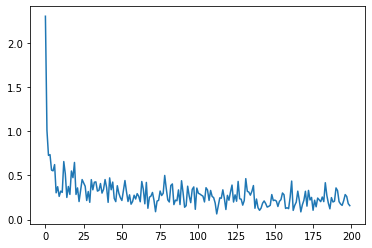

In [9]:
train_loss = []
for epoch in range(num_epoches):
    train(epoch)
    test()
plt.plot(train_loss)